In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
train = pd.read_csv(os.path.join('data', 'train.csv'))
test = pd.read_csv(os.path.join('data', 'test.csv'))

NameError: name 'pd' is not defined

First let's take a look at the summary of all the data.  
It appears that 'Age,' 'Cabin,' and 'Embarked' have nulls that we'll have to deal with. 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It appears that we can drop the 'PassengerId' column. 

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survived

So we can see that 62% of the people in the training set died. This is slightly less than the estimated 67% that died in the actual shipwreck (1500/2224).

In [15]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

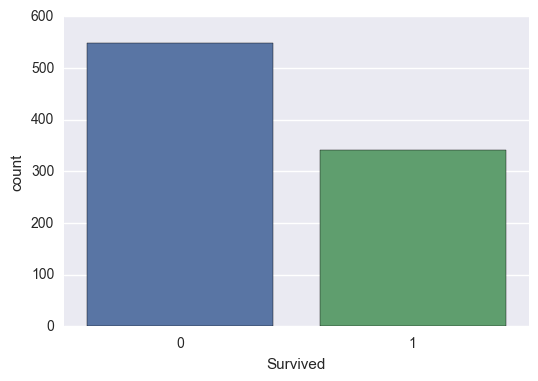

In [9]:
sns.countplot(train['Survived'])

## Pclass

Class played a critical role in survival, as the survival rate decreased drastically for the lowest class.

In [18]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

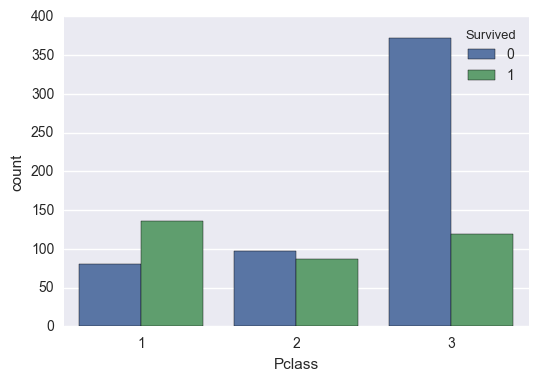

In [11]:
sns.countplot(train['Pclass'], hue=train['Survived'])

## Name  

The name column might contain useful information about the person's title.  
Other things to look at:
- the correlation between the length of a person's name and their survival rate.

In [24]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [104]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [105]:
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Capt.          1
Sir.           1
the            1
Don.           1
Jonkheer.      1
Ms.            1
Mme.           1
Lady.          1
Name: Name_Title, dtype: int64

In [106]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

Looking at the relationship between the lenght of a name and survival rate appears to indicate that there is indeed a clear relationship...

In [39]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))

In [40]:
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
[12, 19]    0.220588
(19, 23]    0.301282
(23, 27]    0.319797
(27, 32]    0.442424
(32, 82]    0.674556
Name: Survived, dtype: float64

In [41]:
pd.qcut(train['Name_Len'],5).value_counts()

[12, 19]    204
(23, 27]    197
(32, 82]    169
(27, 32]    165
(19, 23]    156
Name: Name_Len, dtype: int64

## Sex

In [43]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [44]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Age

There are 177 nulls for Age, and they have a 10% lower survival rate. We might want to include an Age_null flag.

In [109]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [46]:
pd.qcut(train['Age'],5).value_counts()

[0.42, 19]    164
(31.8, 41]    144
(41, 80]      142
(19, 25]      137
(25, 31.8]    127
Name: Age, dtype: int64

Upon first glance, the relationship between Age and Survival appears to be a murky one at best.

In [50]:
train['Survived'].groupby(pd.qcut(train['Age'],10)).mean()

Age
[0.42, 14]    0.584416
(14, 19]      0.390805
(19, 22]      0.283582
(22, 25]      0.371429
(25, 28]      0.393443
(28, 31.8]    0.393939
(31.8, 36]    0.483516
(36, 41]      0.358491
(41, 50]      0.397436
(50, 80]      0.343750
Name: Survived, dtype: float64

## SibSp  

Upon first glance, I'm not too convinced of the importance of this variable. It does seem that people traveling with no spouses had a lower rate of survival, but not by much.

In [53]:
train['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [56]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [54]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

## Parch

Same conclusions as Sibsp: passengers with zero parents or children had a lower likelihood of survival than otherwise, but that survival rate was only slightly less than the overall population survival rate. 

In [58]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [59]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [121]:
pd.pivot_table(train, 'Survived', 'SibSp', 'Parch', aggfunc='mean', margins=True)

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,0.303538,0.657895,0.724138,1.000000,0.0,0.000000,NaN,0.345395
1,0.520325,0.596491,0.631579,0.333333,0.0,0.333333,0.0,0.535885
2,0.250000,0.857143,0.500000,1.000000,NaN,NaN,NaN,0.464286
3,1.000000,0.000000,0.285714,NaN,NaN,NaN,NaN,0.250000
4,NaN,0.000000,0.333333,NaN,NaN,NaN,NaN,0.166667
5,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
8,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
All,0.343658,0.550847,0.500000,0.600000,0.0,0.200000,0.0,0.383838


In [122]:
pd.pivot_table(train, 'Survived', 'SibSp', 'Parch', aggfunc='count', margins=True)

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537.0,38.0,29.0,1.0,1.0,2.0,NaN,608.0
1,123.0,57.0,19.0,3.0,3.0,3.0,1.0,209.0
2,16.0,7.0,4.0,1.0,NaN,NaN,NaN,28.0
3,2.0,7.0,7.0,NaN,NaN,NaN,NaN,16.0
4,NaN,9.0,9.0,NaN,NaN,NaN,NaN,18.0
5,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0
8,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0
All,678.0,118.0,80.0,5.0,4.0,5.0,1.0,891.0


In [117]:
train['SibSp'].apply(lambda x: str(x))+train['Parch'].apply(lambda x: str(x))

0      10
1      10
2      00
3      10
4      00
5      00
6      00
7      31
8      02
9      10
10     11
11     00
12     00
13     15
14     00
15     00
16     41
17     00
18     10
19     00
20     00
21     00
22     00
23     00
24     31
25     15
26     00
27     32
28     00
29     00
       ..
861    10
862    00
863    82
864    00
865    00
866    10
867    00
868    00
869    11
870    00
871    11
872    00
873    00
874    10
875    00
876    00
877    00
878    00
879    01
880    01
881    00
882    00
883    00
884    00
885    05
886    00
887    00
888    12
889    00
890    00
dtype: object

## Ticket  

Upon first glance, the Ticket column is useless and I think I'll just remove it for not. 

In [110]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

## Fare

There is a clear relationship between Fare and Survived, but I'm guessing that this relationship is identical to that of Class and Survived.

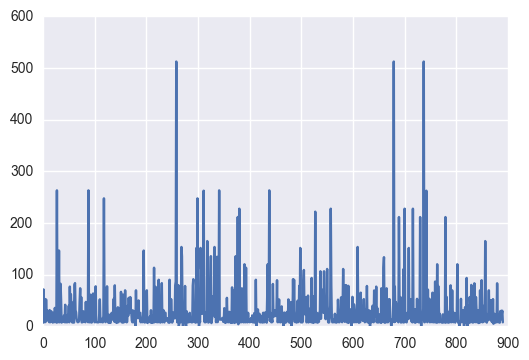

In [60]:
plt.plot(train['Fare'])

In [61]:
pd.qcut(train['Fare'], 10).value_counts()

(7.854, 8.05]        106
[0, 7.55]             92
(27, 39.688]          91
(39.688, 77.958]      89
(21.679, 27]          89
(14.454, 21.679]      88
(77.958, 512.329]     87
(7.55, 7.854]         87
(10.5, 14.454]        84
(8.05, 10.5]          78
Name: Fare, dtype: int64

In [64]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
[0, 8.662]       0.198052
(8.662, 26]      0.402778
(26, 512.329]    0.559322
Name: Survived, dtype: float64

Let's look at the relationship between Class and Fare

In [70]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"[0, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


## Cabin

This column as the most nulls (almost 700), and it might be a useless column unless we try to extract information from it, like the first letter of each cabin. 

#### Cabin Letter

In [112]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [113]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [114]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

#### Cabin Number

Upon first glance, this appears to be useless. Not only do we have ~700 nulls which will be difficult to impute, but the correlation is almost zero...

In [91]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x <> '' else np.NaN)

In [97]:
pd.qcut(train['Cabin_num'],5).value_counts()

(19.8, 33]     41
(85.2, 148]    40
(33, 52]       40
[2, 19.8]      40
(52, 85.2]     39
Name: Cabin_num, dtype: int64

In [94]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 10)).mean()

Cabin_num
[2, 7]          0.666667
(7, 19.8]       0.789474
(19.8, 26.7]    0.700000
(26.7, 33]      0.666667
(33, 43]        0.736842
(43, 52]        0.666667
(52, 68.3]      0.578947
(68.3, 85.2]    0.600000
(85.2, 101]     0.714286
(101, 148]      0.578947
Name: Survived, dtype: float64

In [95]:
train['Survived'].corr(train['Cabin_num'])

-0.063845959227893712

## Embarked

Looks like the Cherbourg people had a 20% hihger survival rate than the other embarking locations. This is very likely due to the high presence of upper-class passengers from that location.

In [98]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [100]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

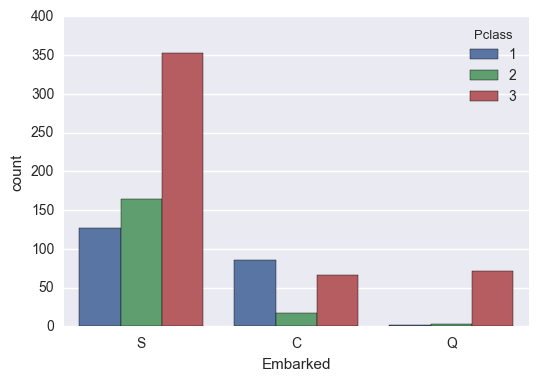

In [103]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

## Helper functions

In [147]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [169]:
train, test = names(train, test)

In [151]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [170]:
train, test = age_impute(train, test)

In [153]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [171]:
train, test = cabin(train, test)

In [156]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [172]:
train, test = embarked_impute(train, test)

In [167]:
def dummies(train, test):
    columns = ['Pclass', 'Sex', 'Embarked', 'Cabin_Letter', 'Name_Title']
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [173]:
train, test = dummies(train, test)

In [178]:
def drop(train, test, bye = ['Ticket', 'SibSp', 'Parch']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [180]:
train, test = drop(train, test, ['SibSp', 'Parch'])

In [181]:
print train.columns
print len(train.columns)

Index([u'PassengerId', u'Survived', u'Age', u'Fare', u'Name_Len',
       u'Age_Null_Flag', u'Pclass_3', u'Pclass_1', u'Pclass_2', u'Sex_male',
       u'Sex_female', u'Embarked_S', u'Embarked_C', u'Embarked_Q',
       u'Cabin_Letter_n', u'Cabin_Letter_C', u'Cabin_Letter_E',
       u'Cabin_Letter_G', u'Cabin_Letter_D', u'Cabin_Letter_A',
       u'Cabin_Letter_B', u'Cabin_Letter_F', u'Name_Title_Mr.',
       u'Name_Title_Mrs.', u'Name_Title_Miss.', u'Name_Title_Master.',
       u'Name_Title_Rev.', u'Name_Title_Dr.', u'Name_Title_Ms.',
       u'Name_Title_Col.'],
      dtype='object')
30
